# 网址 https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [12]:
from torch.utils.data import TensorDataset, DataLoader
%matplotlib inline
import torch
import torch.nn as nn
import pandas as pd
import sys
sys.path.append('..')
import library.d2lzh_pytorch as d2l

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')

2.0.1


In [13]:
train_data = pd.read_csv('../Datasets/Kaggle_house/train.csv')
test_data = pd.read_csv('../Datasets/Kaggle_house/test.csv')

In [14]:
train_data.shape

(1460, 81)

In [15]:
test_data.shape

(1459, 80)

In [16]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# 对数据进行预处理——标准化
对于缺失的特征值,我们将其替换成该特征的均值

In [22]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index # 筛选出中所有数值类型的列的数据类型信息。
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / x.std() # 标准化操作
)
# 标准化后,每个特征的均值变为0,所以可以直接用0来替换缺失值
all_features = all_features.fillna(0)
all_features.dtypes

MSSubClass               float64
LotFrontage              float64
LotArea                  float64
OverallQual              float64
OverallCond              float64
                          ...   
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
SaleCondition_nan        float64
Length: 353, dtype: object

In [20]:
# dummy_na=True将缺失值也当作合法的特征值并为其创建指示特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,False,True,False,False,False,False,False,True,False,False
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,False,True,False,False,False,False,False,True,False,False
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,False,True,False,False,False,False,False,True,False,False
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,False,True,False,True,False,False,False,False,False,False
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,False,True,False,False,False,False,False,True,False,False


In [23]:
n_train_data = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train_data].values, dtype=torch.float)
test_features = torch.tensor(all_features[n_train_data:].values, dtype=torch.float)
train_labels = torch.tensor(train_data.SalePrice, dtype=torch.float).view(-1, 1)

In [24]:
loss = torch.nn.MSELoss()

def get_net(features_num):
    net = nn.Linear(features_num, 1)
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01)
    return net

## 对数均方根误差

In [25]:
def log_rmse(net, features, labels):
    with torch.no_grad(): # 关闭梯度计算
        # 将小于1的值设置成1，使得取对数的时候更加稳定
        clipped_preds = torch.max(net(features), torch.tensor(1.0))
        rmse = torch.sqrt(loss(clipped_preds.log(), labels.log()).mean())
        return rmse.item()

In [26]:
def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    dataset = TensorDataset(train_features, train_labels)
    train_iter = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    # Adam 优化算法
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    net = net.float()
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X.float()), y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# K折交叉检验

In [27]:

def get_k_fold_data(k, i, X, y):
    # 确保折数大于1
    assert k > 1

    # 每一折的大小
    fold_size = X.shape[0] // k

    # 初始化训练集和验证集
    X_train, y_train = None, None

    # 遍历每一折，分割数据
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)  # 当前折的数据索引
        X_part, y_part = X[idx, :], y[idx]  # 提取当前折的数据

        if j == i:  # 如果是第i折，作为验证集
            X_valid, y_valid = X_part, y_part
        elif X_train is None:  # 初始化训练集
            X_train, y_train = X_part, y_part
        else:  # 其余的折数据合并到训练集中
            X_train = torch.cat((X_train, X_part), dim=0)
            y_train = torch.cat((y_train, y_part), dim=0)

    return X_train, y_train, X_valid, y_valid


In [28]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0  # 初始化训练和验证的总误差
    
    # 遍历每一折交叉验证
    for i in range(k):
        # 获取第i折的训练集和验证集
        data = get_k_fold_data(k, i, X_train, y_train)
        
        # 初始化网络模型
        net = get_net(X_train.shape[1])
        
        # 训练网络并返回训练和验证的误差
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size)
        
        # 累加训练集和验证集的误差
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        
        # 在第一次折时绘制训练和验证的误差曲线
        if i == 0:
            d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse', 
                         range(1, num_epochs + 1), valid_ls, ['train', 'valid'])
        
        # 打印每一折的训练和验证误差
        print(f'fold {i}, train rmse {train_ls[-1]:.6f}, valid rmse {valid_ls[-1]:.6f}')
    
    # 返回训练和验证的平均误差
    return train_l_sum / k, valid_l_sum / k


fold 0, train rmse 2.113259, valid rmse 3.898379
fold 1, train rmse 1.782911, valid rmse 3.460099
fold 2, train rmse 1.775721, valid rmse 3.619259
fold 3, train rmse 2.021788, valid rmse 3.280700
fold 4, train rmse 1.964308, valid rmse 3.889385
fold 5, train rmse 2.093841, valid rmse 3.567985
fold 6, train rmse 1.690577, valid rmse 3.421982
fold 7, train rmse 1.920906, valid rmse 2.652519
fold 8, train rmse 1.601486, valid rmse 3.651492
fold 9, train rmse 1.735048, valid rmse 2.776429
10-fold validation: avg train rmse 1.869985, avg valid rmse 3.421823


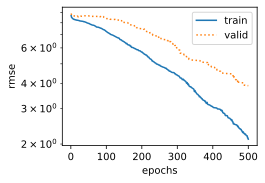

In [29]:
k, num_epochs, lr, weight_decay, batch_size = 10, 500, 10, 0, 64  
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f' %  (k, train_l, valid_l))

In [30]:
def train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr, weight_decay, batch_size):
    # 初始化模型
    net = get_net(train_features.shape[1])

    # 训练模型并记录训练误差
    train_ls, _ = train(net, train_features, train_labels, None, None, num_epochs, lr, weight_decay, batch_size)

    # 绘制训练误差随epoch变化的曲线
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')

    # 打印最终的训练RMSE
    print('train rmse %f' % train_ls[-1])

    # 使用训练好的模型进行预测
    preds = net(test_features).detach().numpy()

    # 将预测结果添加到测试数据中
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])

    # 创建提交文件并保存
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('./submission.csv', index=False)


train rmse 1.571473


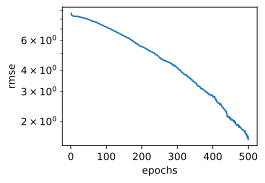

In [31]:
train_and_pred(train_features, test_features, train_labels,  test_data, num_epochs, lr, weight_decay, batch_size)